In [ ]:

EDA


In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
bike=pd.read_csv('BIKE DETAILS.csv')
bike.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
1. What is the range of selling prices in the dataset?

In [9]:
price_range=bike['selling_price'].max()-bike['selling_price'].min()

In [10]:
price_range

755000

In [ ]:
2. What is the median selling price for bikes in the dataset?

In [17]:
Med=bike['selling_price'].median()
Med

45000.0

In [ ]:
3.What is the most common seller type?

In [24]:
bike['seller_type'].mode()[0]

'Individual'

In [ ]:
4.How many bikes have driven more than 50,000 kilometers?

In [69]:
km=bike['km_driven']>50000
km.sum()

170

In [ ]:
5. What is the average km_driven value for each ownership type?

In [61]:
avg=bike.groupby('owner')['km_driven'].mean()
avg

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [ ]:
6.What proportion of bikes are from the year 2015 or older?

In [70]:
yr=bike[bike['year']>=2015]
YR=len(yr)/len(bike)
YR

0.527803958529689

In [ ]:
7.What is the trend of missing values across the dataset?

In [71]:
bike.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [ ]:
8.What is the highest ex_showroom_price recorded, and for which bike?

In [84]:
high=bike.loc[bike['ex_showroom_price'].idxmax()]
h_price=high['ex_showroom_price']
h_name=high['name']
h_price,h_name

(1278000.0, 'Harley-Davidson Street Bob')

In [ ]:
9. What is the total number of bikes listed by each seller type?

In [96]:
bike['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [ ]:
10.What is the relationship between selling_price and km_driven for first-owner bikes?

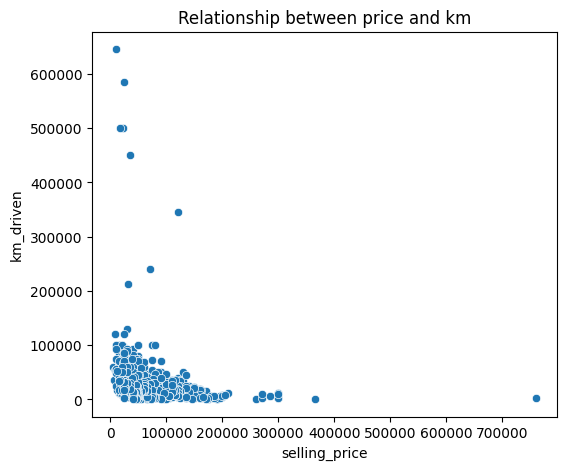

In [104]:
rel=bike[bike['owner']=='1st owner']
plt.figure(figsize=(6,5))
sns.scatterplot(x=rel['selling_price'],y=rel['km_driven'])
plt.title('Relationship between price and km')
plt.xlabel('selling_price')
plt.ylabel('km_driven')
plt.show()

In [ ]:
11.Identify and remove outliers in the km_driven column using the IQR method?

In [116]:
q1=bike['km_driven'].quantile(0.25)
q3=bike['km_driven'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
identy=bike[(bike['km_driven']<lower) | (bike['km_driven']>upper)]
remove_=bike[(bike['km_driven']>=lower)&(bike['km_driven']<=upper)]

In [ ]:
12. Perform a bivariate analysis to visualize the relationship between year and selling_price?

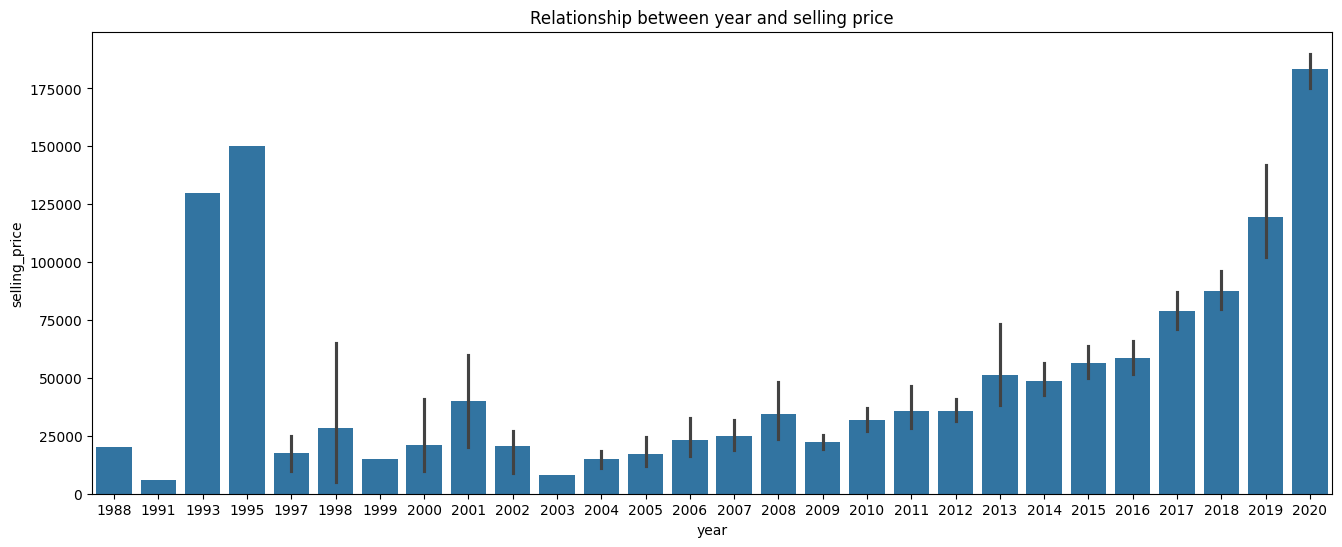

In [120]:
plt.figure(figsize=(16,6))
sns.barplot(data=bike,x=bike['year'],y=bike['selling_price'])
plt.title('Relationship between year and selling price')
plt.xlabel('year')
plt.ylabel('selling_price')
plt.show()

In [ ]:
13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [123]:
import datetime

In [127]:
Year=datetime.datetime.now().year
bike['age']=Year-bike['year']
bike['age']=bike['age'].replace(0,1)
bike['dep']=bike['selling_price']/bike['age']
dep=bike['dep'].mean()
dep

7001.296158257802

In [ ]:
14.Which bike names are priced significantly above the average price for their manufacturing year?

In [138]:
avg_price=bike.groupby('year')['selling_price'].mean()
thr=1.5
bike=bike.merge(avg_price,on='year',suffixes=('','_new'))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,dep,selling_price_new
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6,29166.666667,119689.511628
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,8,5625.000000,78894.736842
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,21428.571429,87660.374046
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10,6500.000000,56500.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,14,1428.571429,35655.721311
...,...,...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,15,1133.333333,31793.333333
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,13,1230.769231,35748.400000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,12,1250.000000,51136.986301
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,16,750.000000,22267.857143


In [139]:
bike['above_avg']=bike['selling_price'] > (thr*bike['selling_price_new'])

In [142]:
name_bike=bike[bike['above_avg']]
name_bike

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,dep,selling_price_new,above_avg
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,21428.571429,87660.374046,True
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,17,10588.235294,34289.285714,True
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,6,60833.333333,119689.511628,True
18,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,23000,148114.0,7,21428.571429,87660.374046,True
23,Jawa Standard,180000,2019,Individual,1st owner,2000,NaN,6,30000.000000,119689.511628,True
...,...,...,...,...,...,...,...,...,...,...,...
979,Royal Enfield Thunder 500,105000,2015,Individual,1st owner,5400,190000.0,10,10500.000000,56500.000000,True
981,Royal Enfield Thunder 350,105000,2013,Individual,1st owner,6900,150000.0,12,8750.000000,51136.986301,True
983,Royal Enfield Classic 350,100000,2015,Individual,1st owner,46500,147000.0,10,10000.000000,56500.000000,True
984,Royal Enfield Classic 500,95000,2014,Individual,1st owner,11500,175000.0,11,8636.363636,48668.131868,True


In [ ]:
16. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [144]:
bike_=bike.select_dtypes(include=['number'])

In [146]:
cor=bike_.corr()

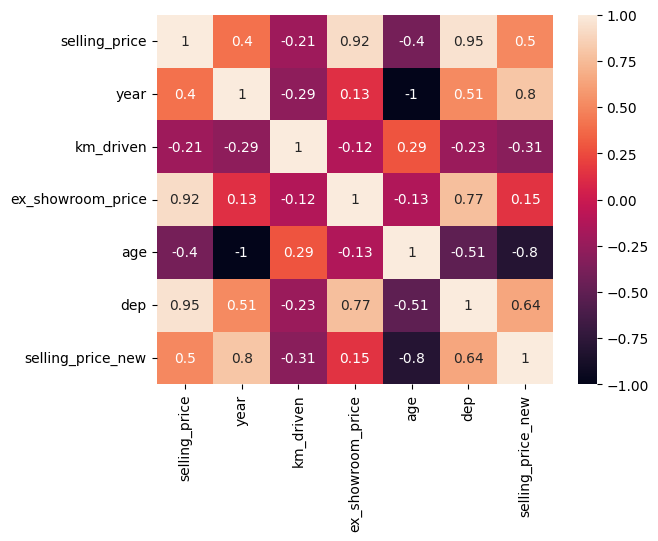

In [147]:
sns.heatmap(data=cor,annot=True)
plt.show()

In [ ]:

dataset 2


In [383]:
car=pd.read_csv('Car Sale.csv')
car.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [150]:
sell_price=car.groupby('Dealer_Name')['Price ($)'].mean()
sell_price

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

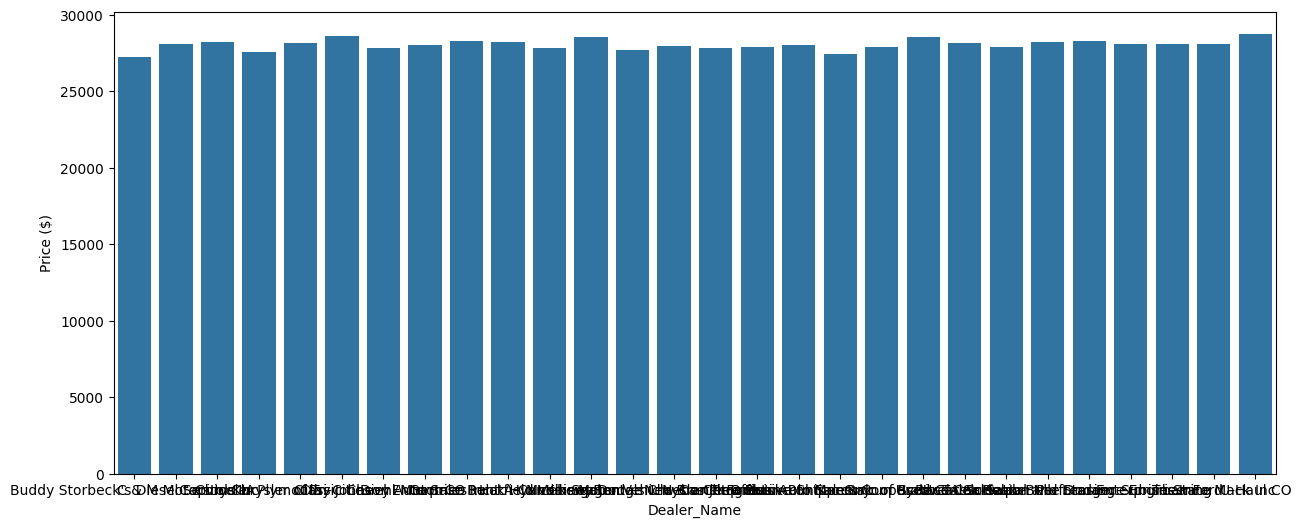

In [154]:
plt.figure(figsize=(15,6))
sns.barplot(data=sell_price)
plt.show()

In [ ]:
2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [161]:
var_price=car.groupby('Company')['Price ($)'].std()

In [164]:
name_car=var_price.idxmax()
var_car=var_price.max()
print(f'The variation in car brand :- name of company is ****{name_car}**** and high variation is ****{var_car}****')

The variation in car brand :- name of company is ****Lincoln**** and high variation is ****19658.050211265567****


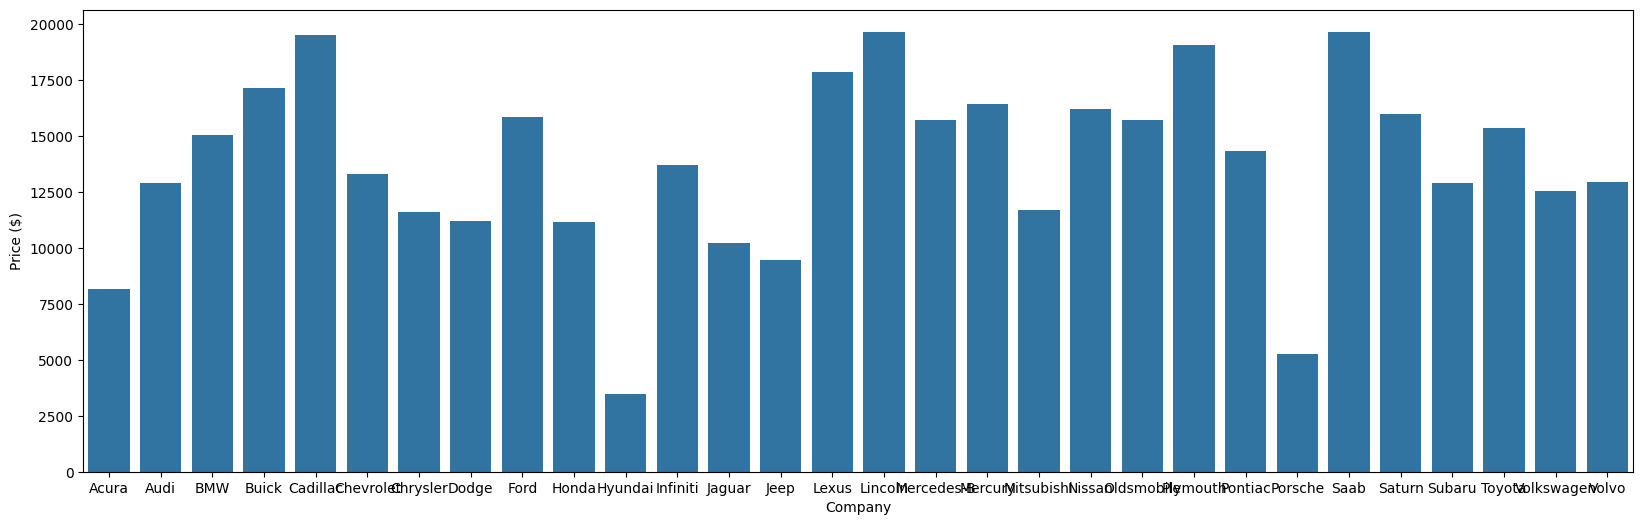

In [166]:
plt.figure(figsize=(20,6))
sns.barplot(data=var_price)
plt.show()

In [ ]:
3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

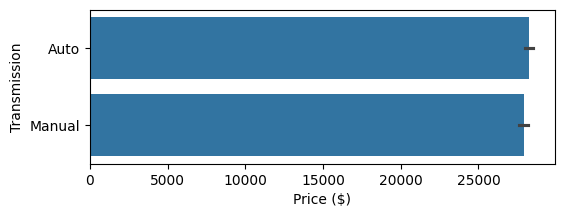

In [172]:
plt.figure(figsize=(6,2))
sns.barplot(data=car,x=car['Price ($)'],y=car['Transmission'])
plt.show()

In [175]:
iqr=car.groupby('Transmission')['Price ($)'].agg(q1=lambda x:x.quantile(0.25),
                                                q3=lambda x:x.quantile(0.75),
                                                IQR=lambda x:x.quantile(0.75)-x.quantile(0.25))
iqr

,q1,q3,IQR
Transmission,,,
Auto,19000.0,35500.0,16500.0
Manual,17000.0,34000.0,17000.0


In [ ]:
4. What is the distribution of car prices across different regions?

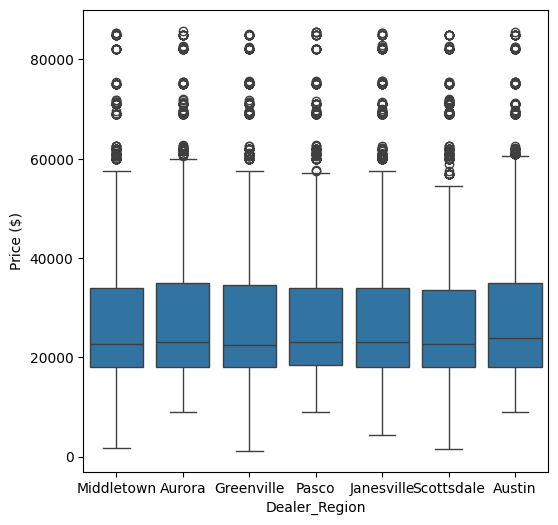

In [184]:
plt.figure(figsize=(6,6))
sns.boxplot(data=car,x='Dealer_Region',y='Price ($)')
plt.show()

In [ ]:
5. What is the distribution of cars based on body styles?

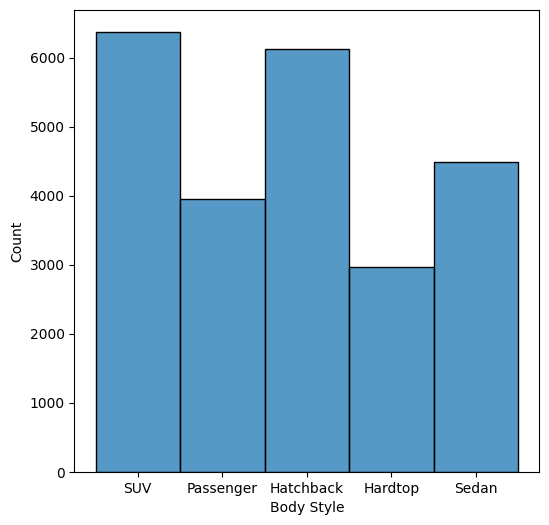

In [191]:
plt.figure(figsize=(6,6))
sns.histplot(data=car,x='Body Style')
plt.show()

In [189]:
car['Body Style'].value_counts()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

In [ ]:
6.How does the average selling price of cars vary by customer gender and annual income?

In [199]:
avg_gen=car.groupby(['Gender','Annual Income'])['Price ($)'].mean()

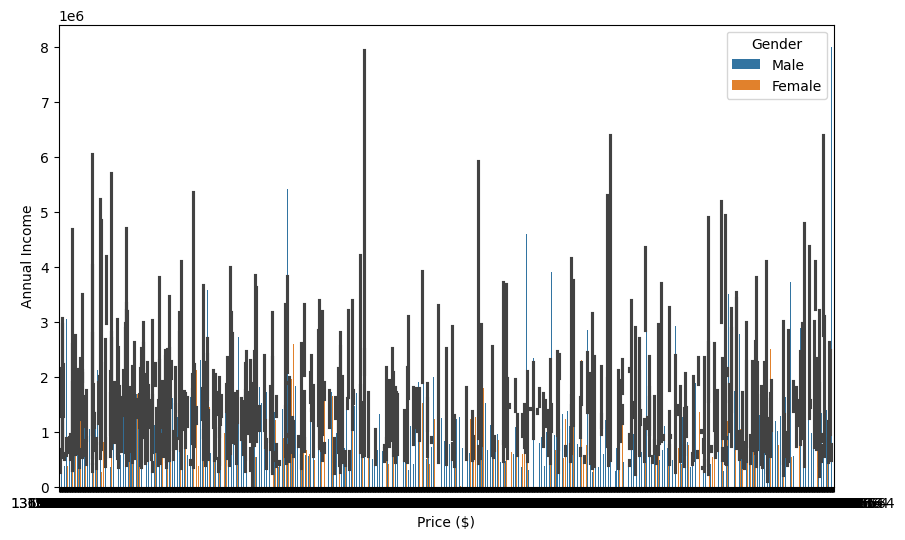

In [208]:
avg_gen=avg_gen.reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=avg_gen,y='Annual Income',x='Price ($)',hue='Gender')
plt.show()

In [ ]:
7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [228]:
sold=car.groupby('Dealer_Region')['Price ($)'].value_counts().reset_index(name='Count')

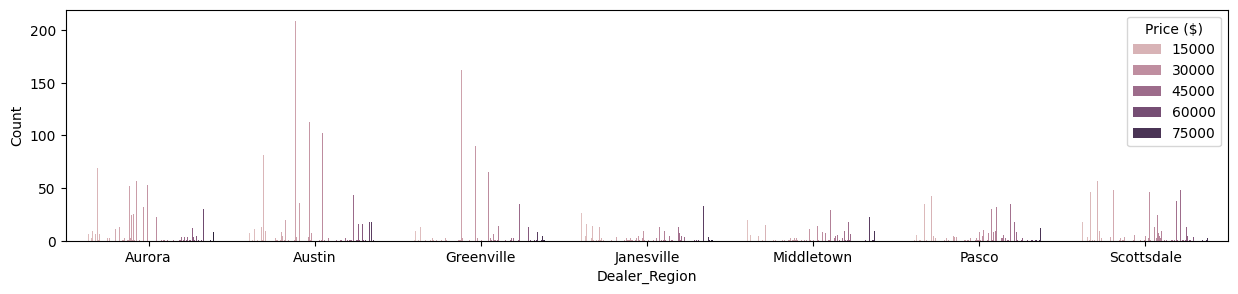

In [234]:
plt.figure(figsize=(15,3))
sns.barplot(data=sold,x='Dealer_Region',hue='Price ($)',y='Count')
plt.show()

In [ ]:
8. How does the average car price differ between cars with different engine sizes?

In [241]:
price_diff=car.groupby(['Company','Engine'])['Price ($)'].mean().reset_index()

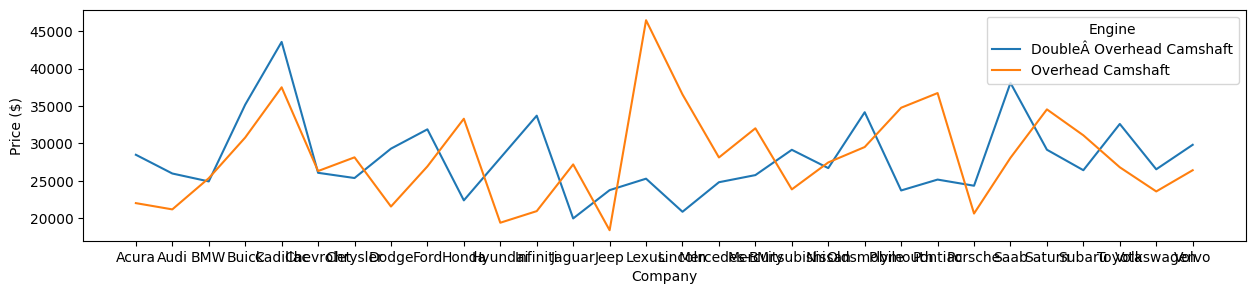

In [245]:
plt.figure(figsize=(15,3))
sns.lineplot(data=price_diff,x='Company',y='Price ($)',hue='Engine')
plt.show()

In [ ]:
9. How do car prices vary based on the customer’s annual income bracket?

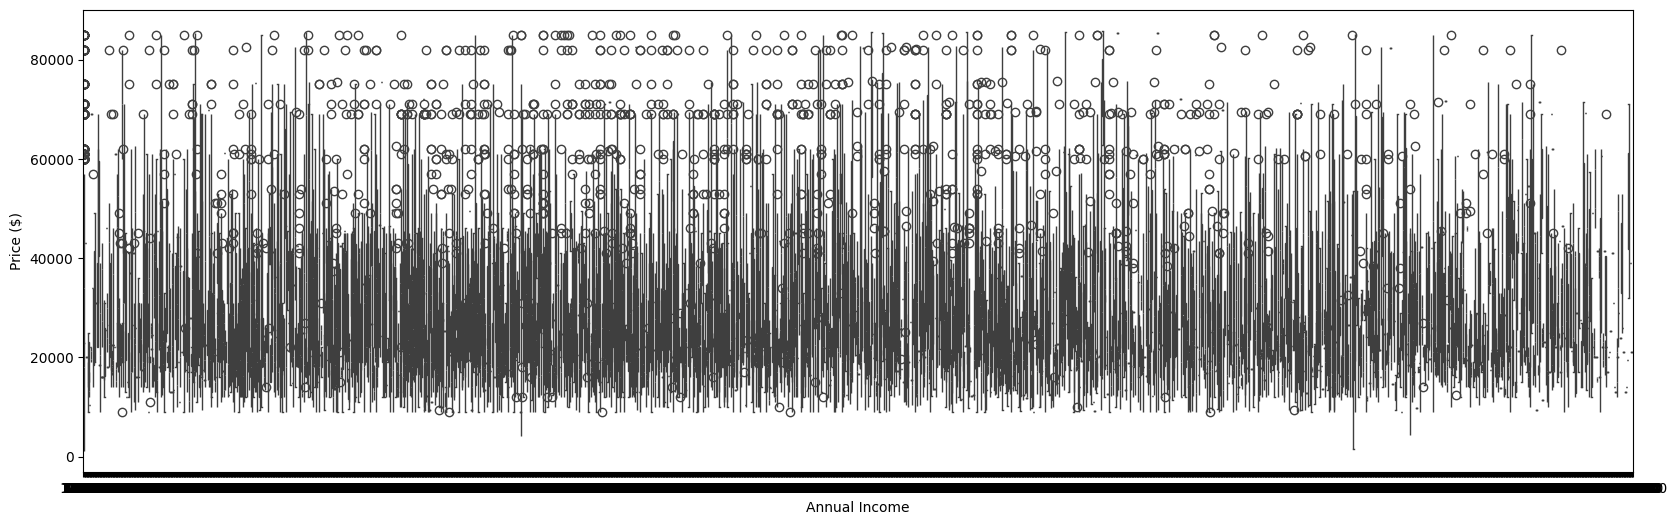

In [254]:
plt.figure(figsize=(20,6))
sns.boxplot(data=car,x='Annual Income',y='Price ($)')
plt.show()

In [ ]:
10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [271]:
model=car['Model'].value_counts().head(5).index

In [272]:
mod=car[car['Model'].isin(model)]

In [ ]:
11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

In [303]:
pri=car.groupby(['Engine','Color'])['Price ($)'].std()

In [311]:
Pri=pri.reset_index()

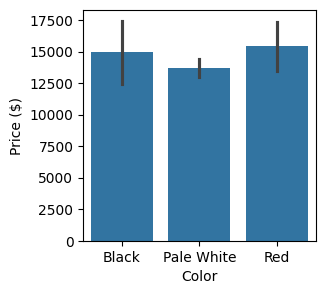

In [316]:
plt.figure(figsize=(3,3))
sns.barplot(data=Pri,x='Color',y='Price ($)')
plt.show()

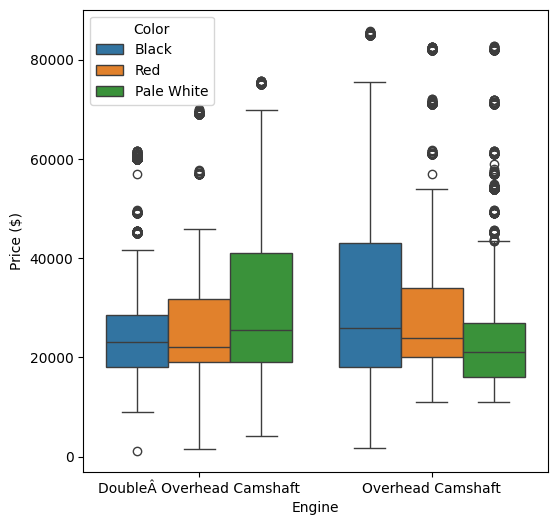

In [294]:
plt.figure(figsize=(6,6))
sns.boxplot(data=car,x='Engine',y='Price ($)',hue='Color')
plt.show()

In [ ]:
12.Is there any seasonal trend in car sales based on the date of sale?

In [346]:
car['Date']=pd.to_datetime(car['Date'],errors='coerce')

In [347]:
car['month']=car['Date'].dt.month

In [359]:
car['year']=car['Date'].dt.year

In [357]:
sale=car['month'].value_counts().sort_index()
Sale=sale.reset_index()

In [360]:
sal=car['year'].value_counts().sort_index()
Sal=sal.reset_index()

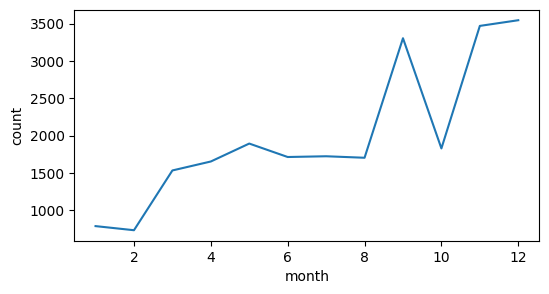

In [364]:
plt.figure(figsize=(6,3))
sns.lineplot(data=Sale,x='month',y='count')
plt.show()

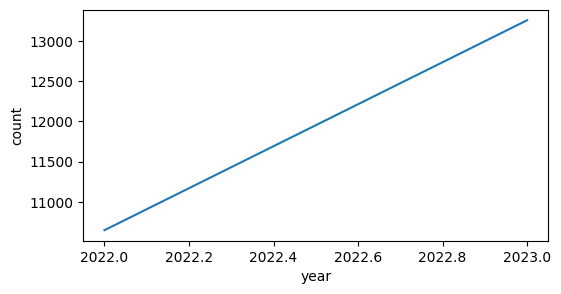

In [365]:
plt.figure(figsize=(6,3))
sns.lineplot(data=Sal,x='year',y='count')
plt.show()

In [ ]:
13.How does the car price distribution change when considering different combinations of body style and transmission type?

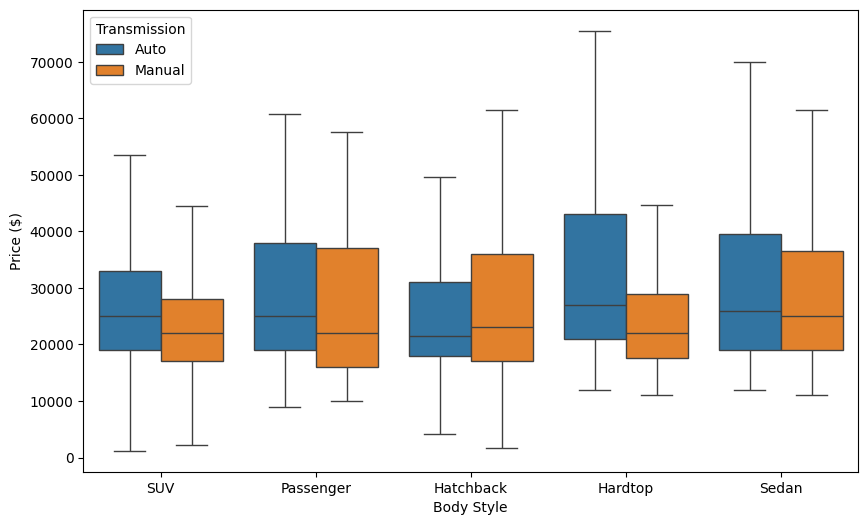

In [370]:
plt.figure(figsize=(10,6))
sns.boxplot(data=car,x='Body Style',y='Price ($)',hue='Transmission',showfliers=False)
plt.show()

In [ ]:
14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [385]:
from sklearn.preprocessing import LabelEncoder

In [386]:
encode=LabelEncoder()

In [387]:
car['size']=encode.fit_transform(car['Engine'])

In [389]:
Car=car.select_dtypes(include=['number'])

In [392]:
Car.drop('Phone',axis=1,inplace=True)

In [397]:
inter=Car.corr()
inter

,Annual Income,Price ($),size
Annual Income,1.000000,0.012065,-0.006598
Price ($),0.012065,1.000000,-0.011271
size,-0.006598,-0.011271,1.000000


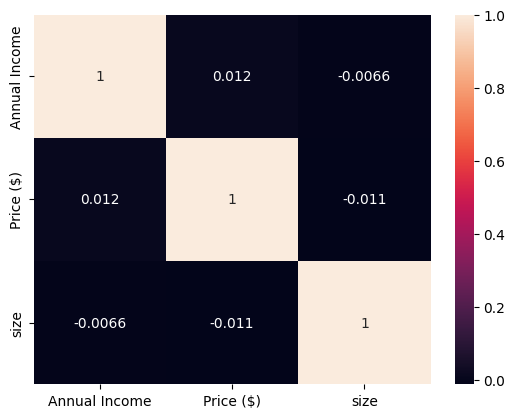

In [396]:
sns.heatmap(data=inter,annot=True)
plt.show()

In [ ]:
15.How does the average car price vary across different car models and engine types?

In [403]:
varr=car.groupby(['Model','Engine'])['Price ($)'].mean()

In [405]:
Vary=varr.reset_index()

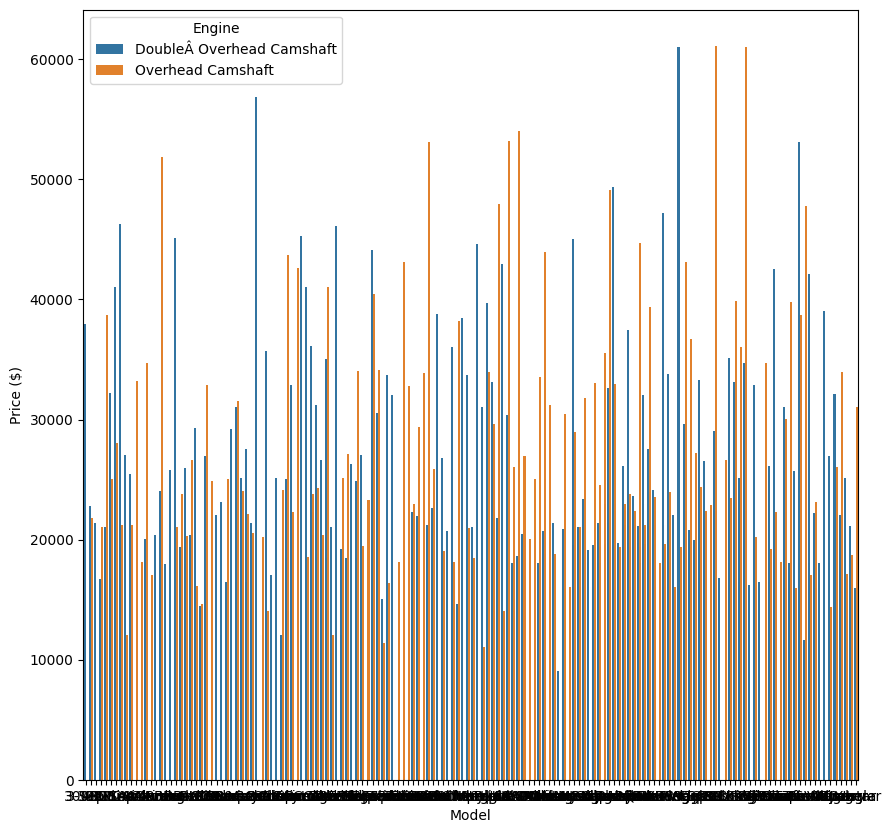

In [410]:
plt.figure(figsize=(10,10))
sns.barplot(data=Vary,x='Model',y='Price ($)',hue='Engine')
plt.show()

In [ ]:

dataset 3


In [412]:
amz=pd.read_csv('amazon.csv')
amz.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
1. What is the average rating for each product category?

In [434]:
amz['rating']=pd.to_numeric(amz['rating'],errors='coerce')

In [435]:
avg=amz.groupby('category')['rating'].mean()

In [439]:
Avg=avg.reset_index()
Avg

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


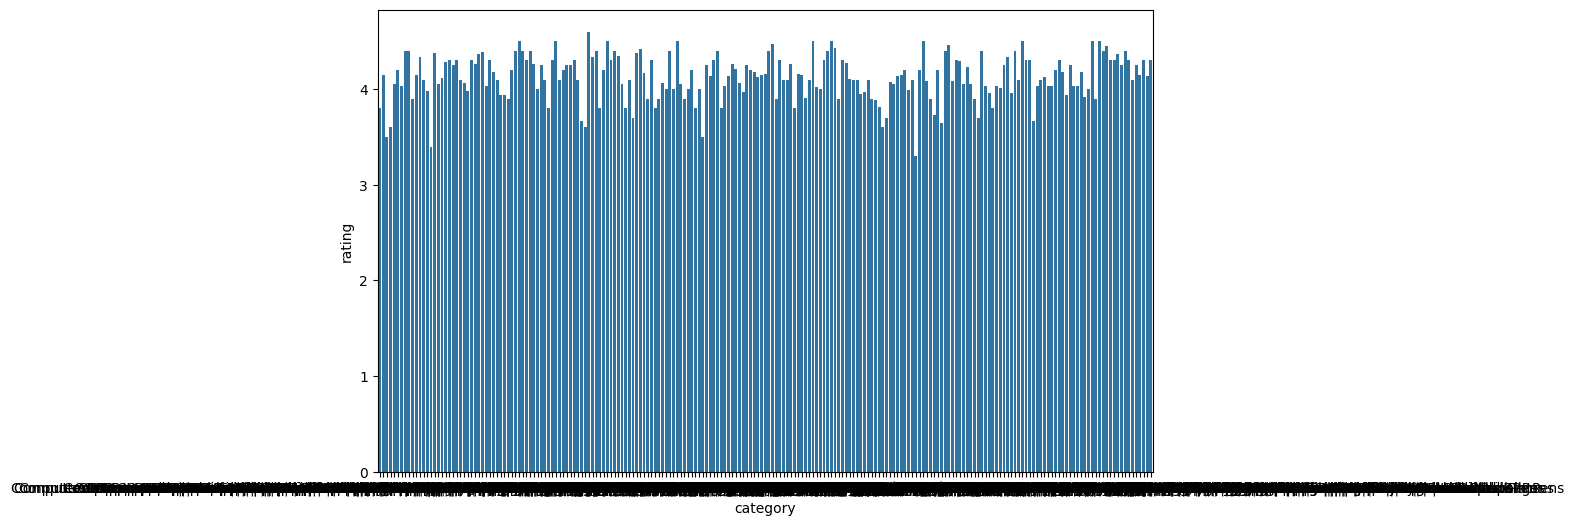

In [438]:
plt.figure(figsize=(10,6))
sns.barplot(data=Avg,x='category',y='rating')
plt.show()

In [ ]:
2. What are the top rating_count products by category?

In [492]:
top=amz.groupby('category')['rating_count'].idxmax().sort_values(ascending=True)

In [505]:
Top=amz.loc[top]

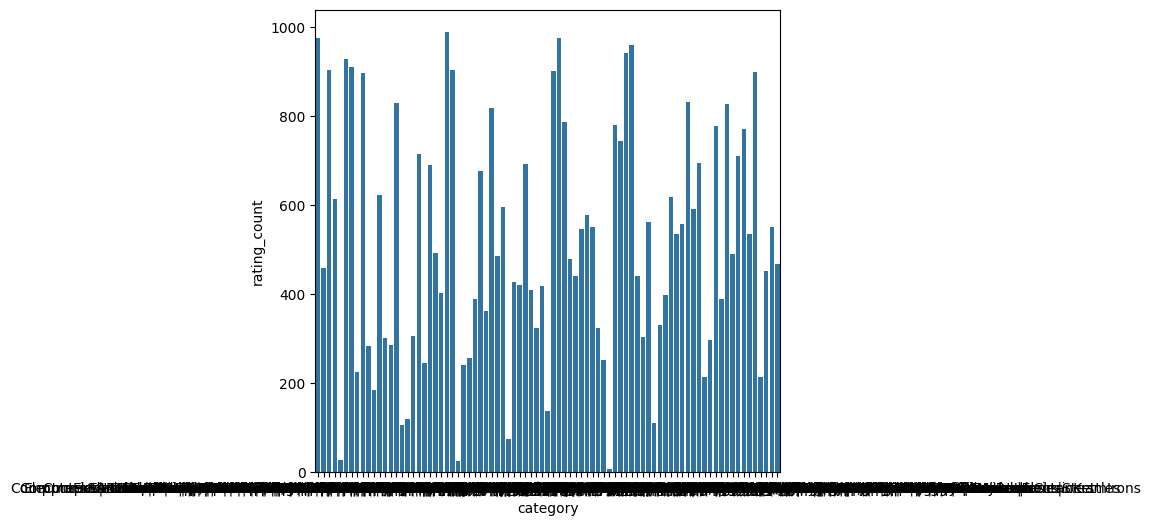

In [507]:
plt.figure(figsize=(6,6))
sns.barplot(data=Top,x='category',y='rating_count')
plt.show()

In [ ]:
3. What is the distribution of discounted prices vs. actual prices?

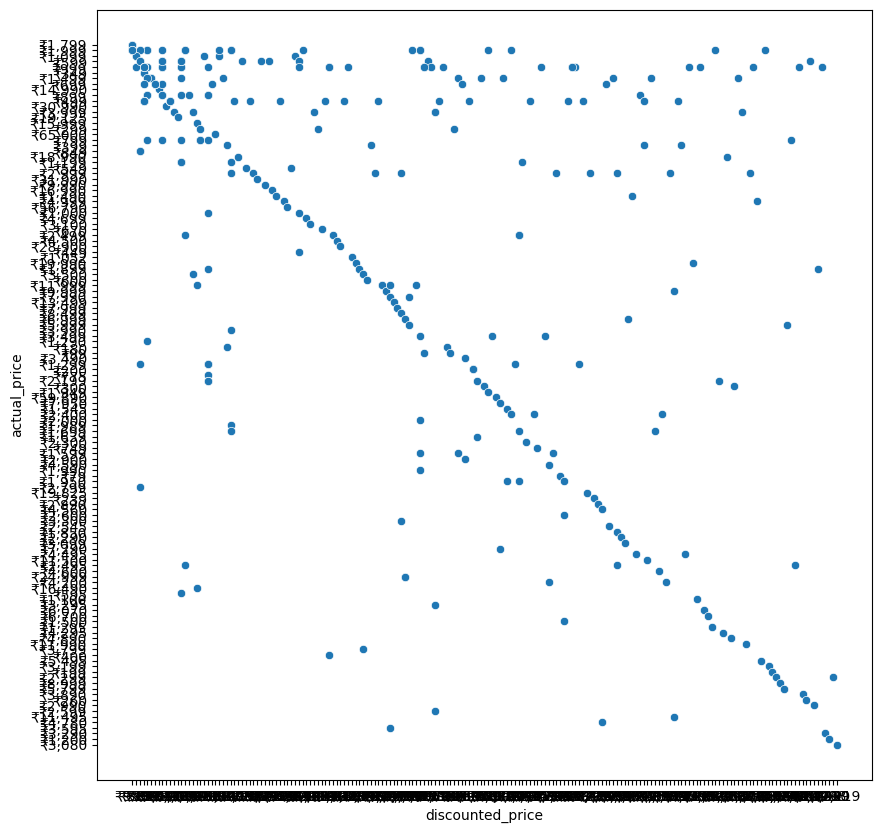

In [513]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=amz,x='discounted_price',y='actual_price')
plt.show()

In [ ]:
4.How does the average discount percentage vary across categories?

In [521]:
amz['discount_percentage']=amz['discount_percentage'].str.replace('%','').astype(float)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12104\1909738852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amz['discount_percentage']=amz['discount_percentage'].str.replace('%','').astype(float)


In [525]:
per=amz.groupby('category')['discount_percentage'].mean()
Per=per.reset_index()

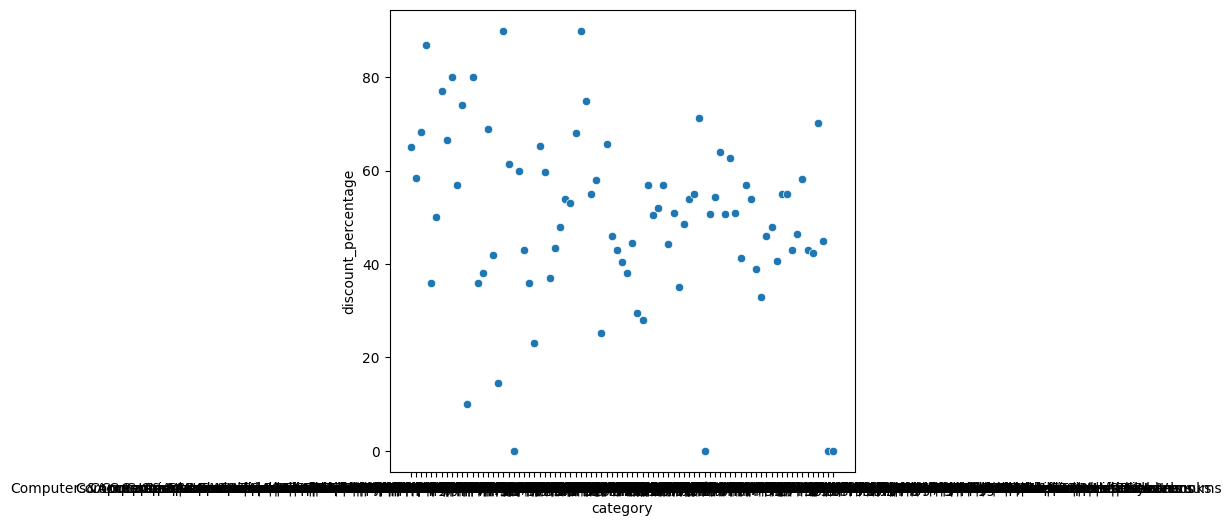

In [526]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=Per,x='category',y='discount_percentage')
plt.show()

In [ ]:
5. What are the most popular product names?

In [545]:
r_max=amz.groupby('product_name')['rating'].max()

In [542]:
nam=r_max.reset_index()

In [551]:
nam=nam.sort_values(by='rating',ascending=False)

In [553]:
nam.head(5)

,product_name,rating
35,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,5.0
252,Syncwire LTG to USB Cable for Fast Charging Co...,5.0
194,"Oratech Coffee Frother electric, milk frother ...",4.8
294,Zuvexa USB Rechargeable Electric Foam Maker - ...,4.7
183,Melbon VM-905 2000-Watt Room Heater (ISI Certi...,4.6


In [ ]:
6. What are the most popular product keywords?

In [559]:
key_word=amz.groupby('about_product')['rating'].max()

In [560]:
word=key_word.reset_index().sort_values(by='rating',ascending=False)

In [562]:
word.head()

,about_product,rating
234,This sturdy and durable cable made of tpe and ...,5.0
180,Reliable wireless connection up to 10m|Advance...,5.0
4,-Make delicious milk foam creamer for your dri...,4.8
229,The food taste stainless steel whisking head i...,4.7
206,Smoothly takes off the lint from fabric suitab...,4.6


In [ ]:
7.What are the most popular product reviews?

In [564]:
rev=amz.groupby('review_content')['rating'].max()

In [565]:
Review=rev.reset_index().sort_values(by='rating',ascending=False)

In [566]:
Review.head()

,review_content,rating
102,I really like this wireless mouse it has becam...,5.0
192,Product is good in quality. Working good with ...,5.0
182,"Overall, I love this Oratech Coffee frother an...",4.8
225,The first time I tried it send the eggs and th...,4.7
79,"Good,Thoda sa kam stable hai, phone lagane ke ...",4.6


In [ ]:
8. What is the correlation between discounted_price and rating?

In [569]:
cor=amz[['discounted_price','rating']]

In [577]:
cor['discounted_price']=cor['discounted_price'].str.replace(',','').astype(float)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12104\432283885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cor['discounted_price']=cor['discounted_price'].str.replace(',','').astype(float)


In [579]:
Cor=cor.corr()

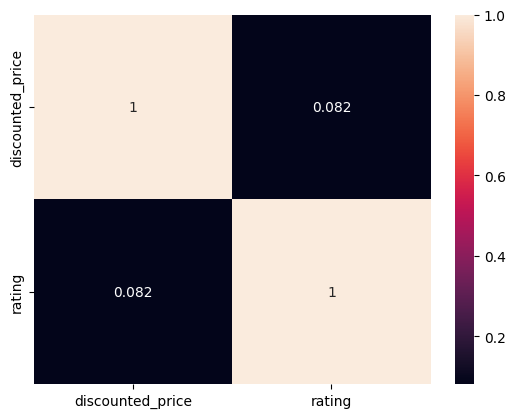

In [580]:
sns.heatmap(data=Cor,annot=True)
plt.show()

In [ ]:
9.What are the Top 5 categories based on the highest ratings?

In [582]:
cat=amz.groupby('category')['rating'].max()

In [583]:
Cat=cat.reset_index().sort_values(by='rating',ascending=False)
Cat.head()

,category,rating
1,Computers&Accessories|Accessories&Peripherals|...,5.0
5,Computers&Accessories|Accessories&Peripherals|...,5.0
59,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8
35,Electronics|Mobiles&Accessories|MobileAccessor...,4.6
79,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4.6


In [ ]:
10. Identify any potential areas for improvement or optimization based on the data analysis.

In [ ]:
Review and improve pricing and discount strategies based on category-specific insights.
Optimize inventory management based on the products with the highest sales and ratings.
Analyze customer reviews and feedback to improve product quality and features.
Focus on regions with higher sales and ratings for targeted marketing and promotions.
Improve product listings (images, descriptions, specifications) for better customer engagement.

In [ ]:

dataset 4


In [ ]:
1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [3]:
sp=pd.read_csv('spotify.csv')

In [587]:
sp.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [589]:
sp.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [595]:
dup=sp.duplicated()

In [ ]:
#no dubplicat found same artist with different song name is not consider as duplicate.

In [ ]:
2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

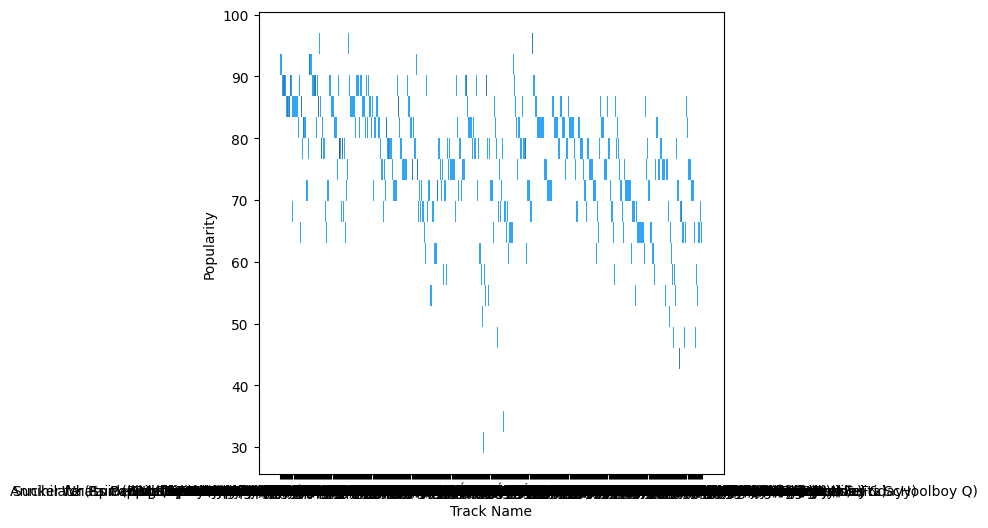

In [5]:
plt.figure(figsize=(6,6))
sns.histplot(data=sp,y='Popularity',x='Track Name')
plt.show()

In [ ]:
3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

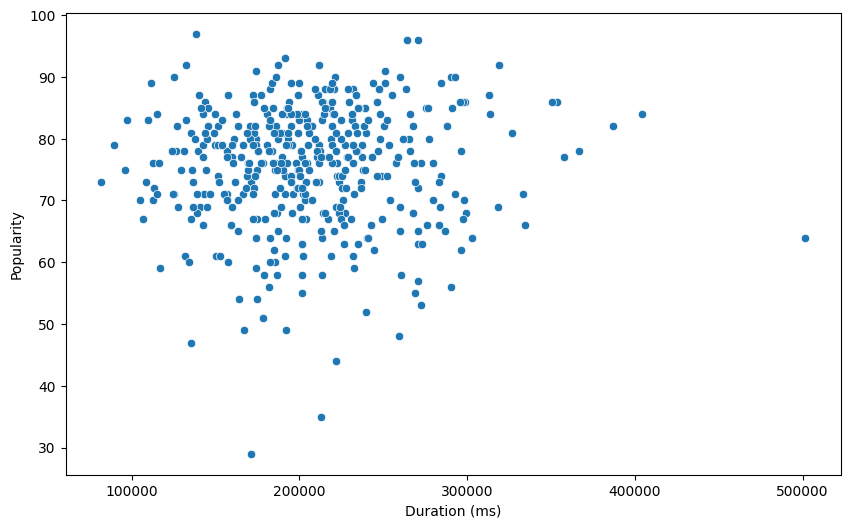

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=sp,y='Popularity',x='Duration (ms)')
plt.show()

In [ ]:
4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

In [16]:
sp['Artist'].value_counts().idxmax()

'Drake'

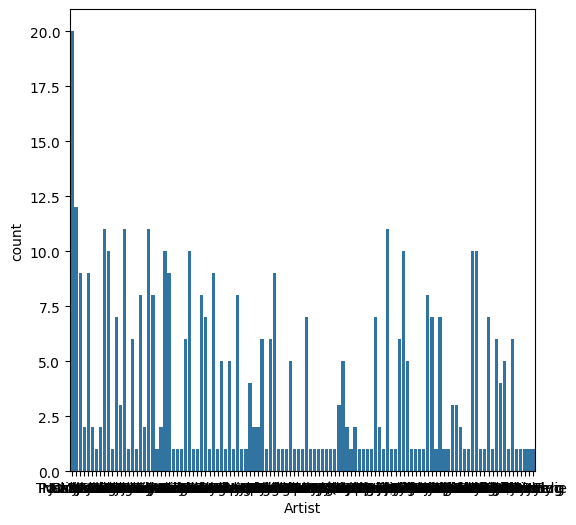

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(data=sp,x='Artist')
plt.show()

In [ ]:
5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [42]:
lst=sp.groupby(['Artist','Track Name'])['Popularity'].min().sort_values(ascending=True)

In [44]:
lst.reset_index().head()

,Artist,Track Name,Popularity
0,Pressa,Attachments (feat. Coi Leray),29
1,Justin Bieber,Intentions,35
2,French Montana,Splash Brothers,44
3,Lil Baby,On Me - Remix,47
4,Wyclef Jean,911 (feat. Mary J. Blige),48


In [ ]:
6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and 
display the average popularity for each artist.

In [45]:
ls=sp.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

In [53]:
ls.reset_index().head()

,Artist,Popularity
0,cassö,92.000000
1,Trueno,89.000000
2,David Guetta,87.000000
3,Travis Scott,87.000000
4,¥$,86.090909


In [ ]:
7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [54]:
art=sp.groupby(['Artist','Track Name'])['Popularity'].max().sort_values(ascending=False)

In [55]:
art.reset_index().head()

,Artist,Track Name,Popularity
0,Jack Harlow,Lovin On Me,97
1,21 Savage,redrum,96
2,¥$,CARNIVAL,96
3,Travis Scott,FE!N (feat. Playboi Carti),93
4,cassö,Prada,92


In [ ]:
8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

In [59]:
num=sp.select_dtypes(include=['number'])

<Figure size 600x600 with 0 Axes>

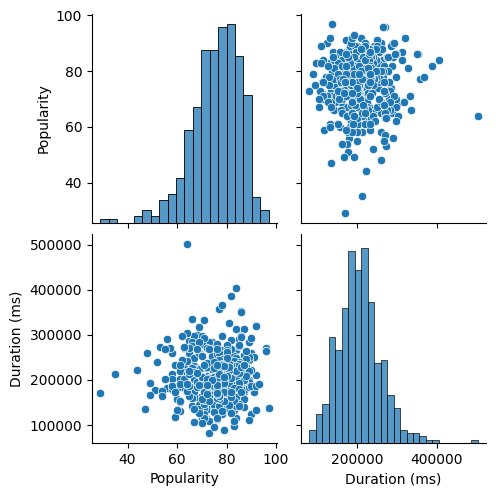

In [61]:
plt.figure(figsize=(6,6))
sns.pairplot(data=num)
plt.show()

In [ ]:
9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or 
violin plot.

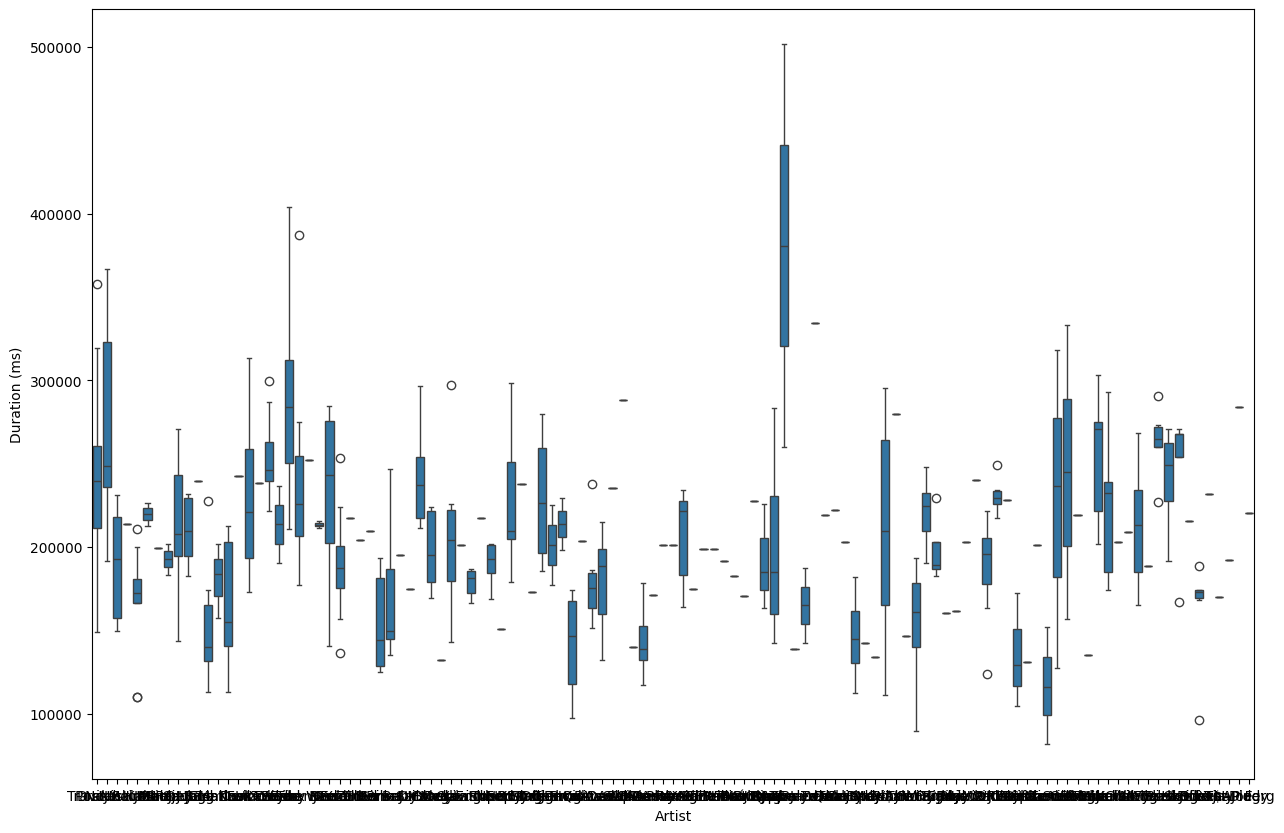

In [64]:
plt.figure(figsize=(15,10))
sns.boxplot(data=sp,y='Duration (ms)',x='Artist')
plt.show()

In [ ]:
10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a 
violin plot.

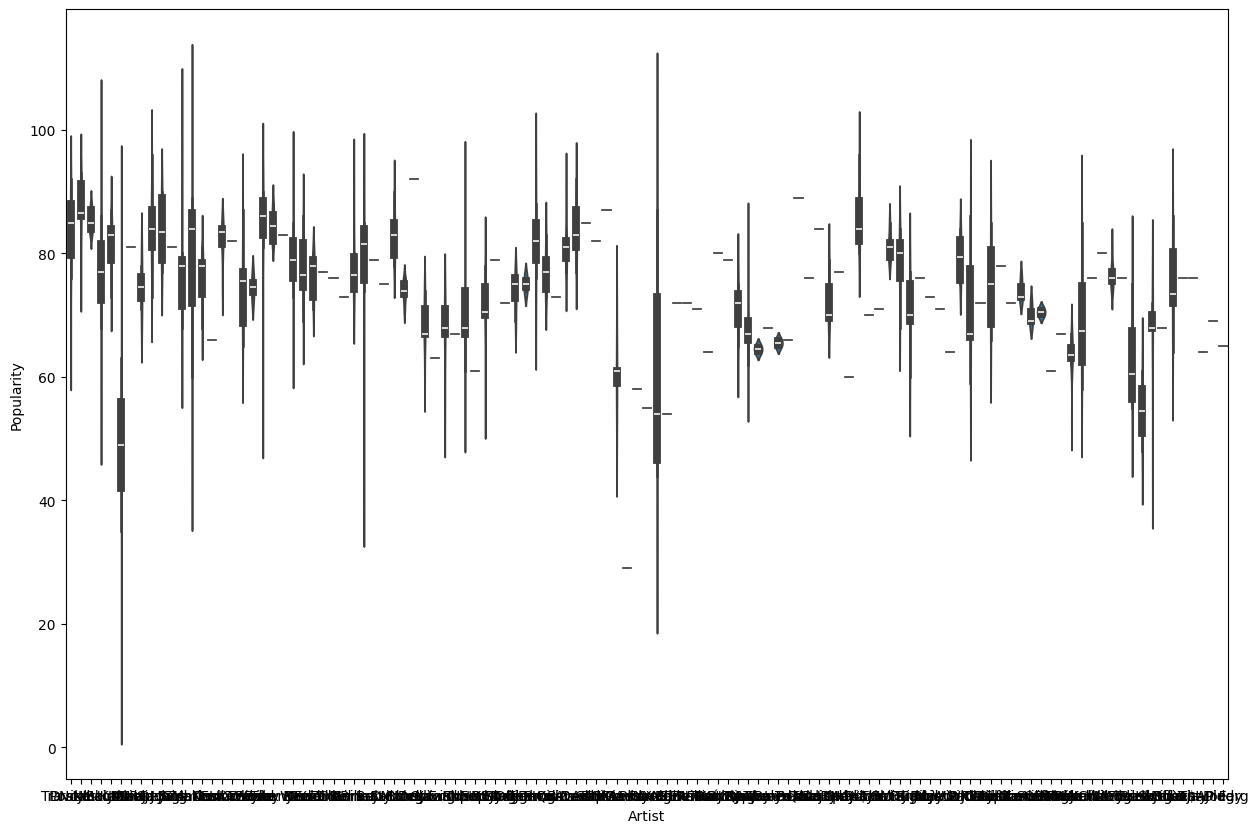

In [66]:
plt.figure(figsize=(15,10))
sns.violinplot(data=sp,y='Popularity',x='Artist')
plt.show()